# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso1-mm-1-7 (86min)](https://www.loom.com/share/92fbb710f02646c59d45c4e8fcfbc469) após 57 min

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [2]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe
From (redirected): https://drive.google.com/uc?id=1FlMtAkb0npwmD54aCysLsxB84PehcKMe&confirm=t&uuid=563551ee-84db-4e15-8192-993dba21a868
To: /content/_morph.py
100% 39.2k/39.2k [00:00<00:00, 35.5MB/s]


In [3]:
from _morph import *
help(mm.areaopen)

Help on function areaopen in module _morph:

areaopen(f, a)
    This function will be dilate g with minimum f, until converge
    input:
      - f: input image
      - a: area
      #- Bc: neighbors
    output:
      - y: result of areaopen



# mmareaopen

Remove qualquer flat com área menor que $a$.

### Equação:

$$f \circ (a)_{B_c} = \bigvee_{B\in \Psi_{B_c,a} } f\circ B $$

$$B\in \Psi_{B_c,a}= \{ X \subset E: X \ is \ Bc-connected, Area(X)\geq a\}$$

```
function y = mmareaopen_equ(f, a, Bc)
if nargin == 2
  Bc = mmsecross;
end
if mmis(f,'binary')
  fr = mmlabel(f,Bc);      % binary area open, use area measurement
  g = mmblob(fr,'area');
  y = mmthreshold(g,a);
else
  y=zeros(size(f));
  for k in range(1,mmmaxlevel(f)+1)  % gray-scale area open, use thresholding decomposition
    fk = mmthreshold(f,k);
    fo = mmareaopen(fk,a,Bc);
    if mmcmp(fo,'==',0)
      break;
    end
    y = y + double(fo);
  end
end
```

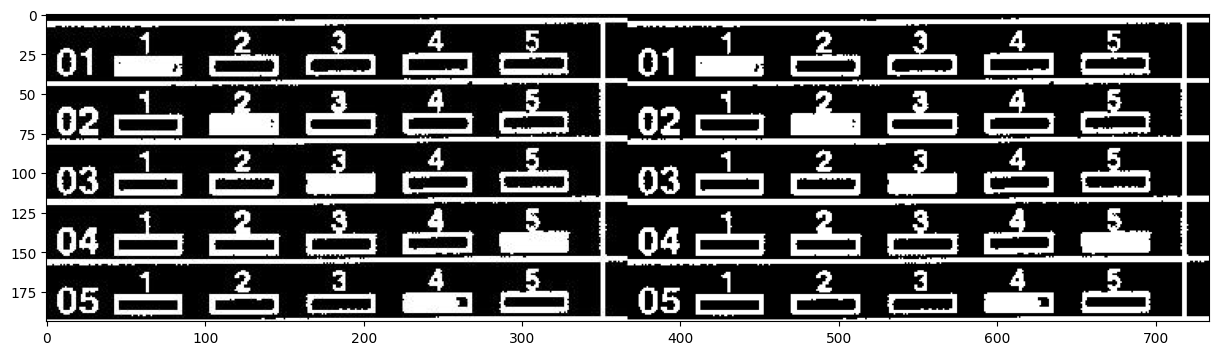

In [4]:
img = mm.read('https://drive.google.com/file/d/1iLqCAwcIe45m2jVhgqD2zPcjij9Ia-Yh/view?usp=sharing')
f = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
#f = f[23:40,7:25]
ret, f1 = cv2.threshold(f, 125, 255, cv2.THRESH_BINARY)*1
plt.figure(figsize=(15, 15))
mm.show(cv2.hconcat((f, f1))) 

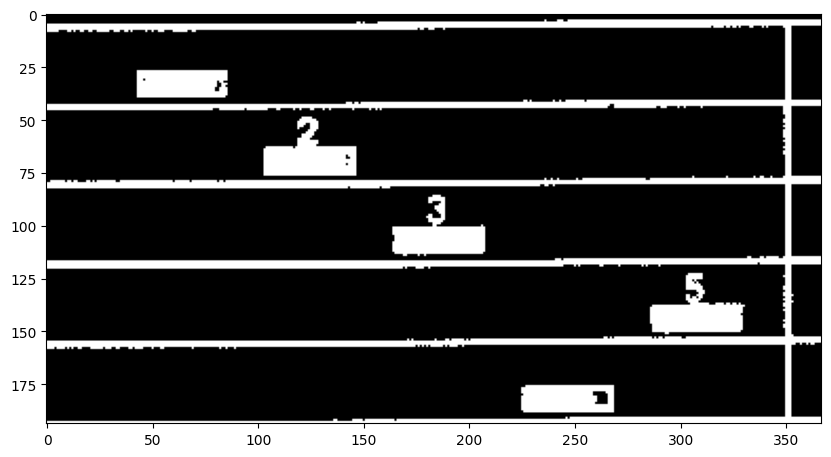

In [5]:
y=mm.areaopen(f1,500)
plt.figure(figsize=(10, 10))
mm.show(y>0)
#(f1/255).astype(int)

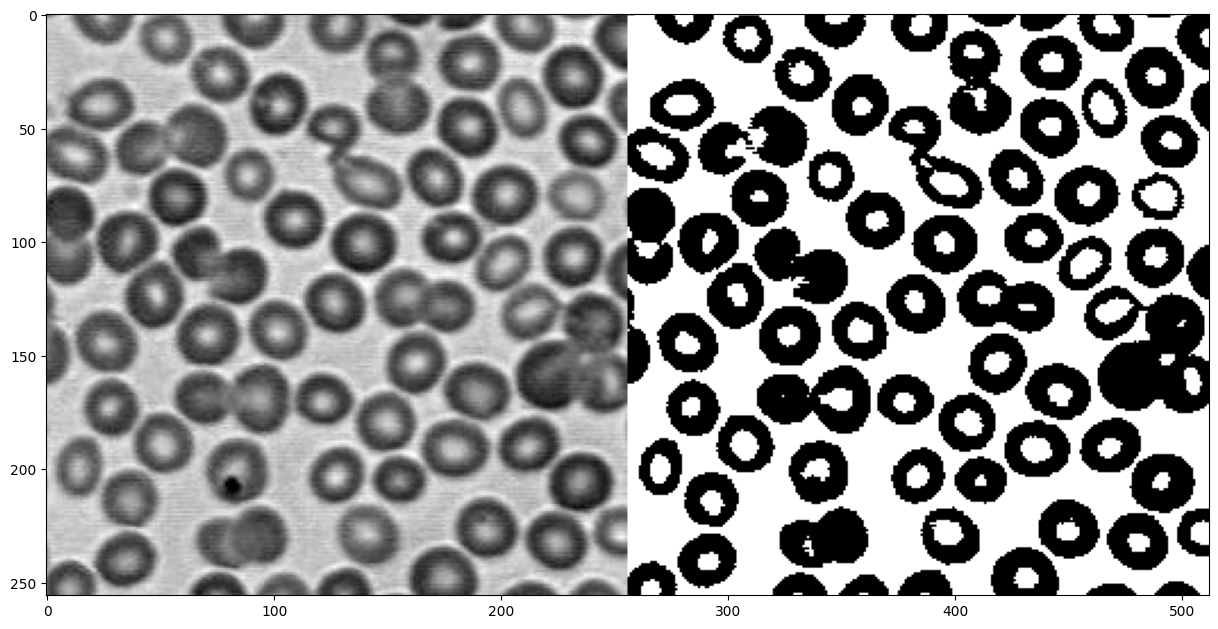

In [6]:
img = mm.read('https://drive.google.com/file/d/1HZBIVAa-Avti8Lx2XH93cCHYTjyeJmVT/view?usp=sharing')
f = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
#f = f[23:40,7:25]
ret, f1 = cv2.threshold(f, 125, 255, cv2.THRESH_BINARY)*1
plt.figure(figsize=(15, 15))
mm.show(cv2.hconcat((f, f1))) 

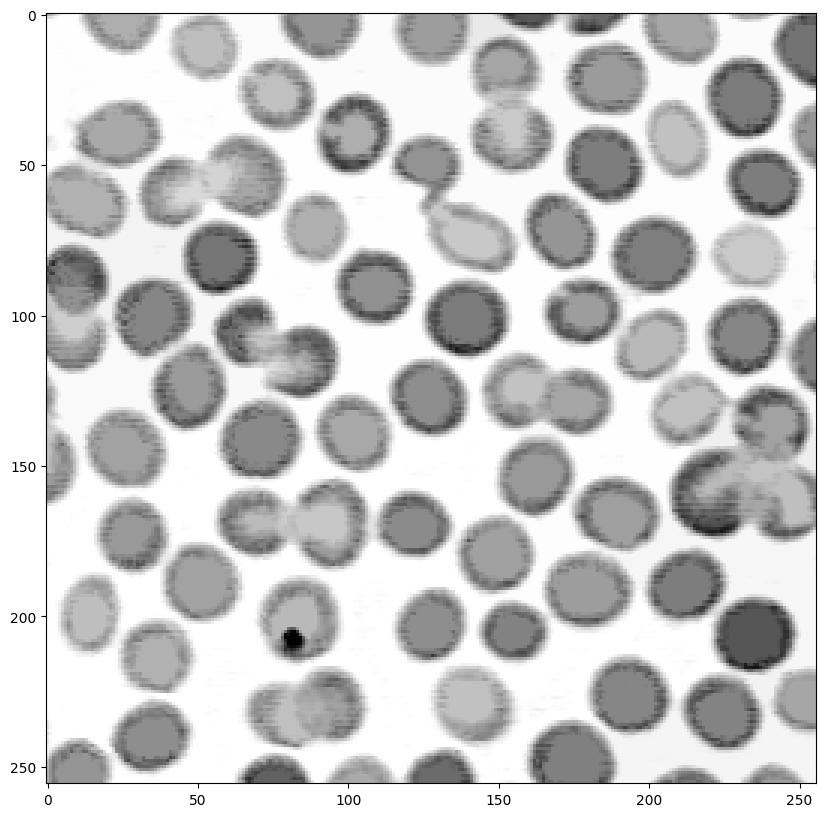

In [7]:
y = mm.areaopen(f,500)
plt.figure(figsize=(10, 10))
mm.show(y)